# Plot the loss for two different scaling methods

In [20]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import plotly.plotly as py
import plotly.graph_objs as go
import ESN
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

def analyze(df, scaler, n_nodes, n_iter):
    if scaler == "m":
        scalar = preprocessing.MinMaxScaler()
    else:
        scalar = preprocessing.StandardScaler()
        
    traces = []
    for i in range(n_iter):

        #scale
        x = df.values
        x_scaled = scalar.fit_transform(x)
        df = pd.DataFrame(x_scaled)
        train = np.array(df)

        dim_input = 8
        W = ESN.RandomMatrix(n_nodes, 0, 0.9)
        v = np.matrix(np.random.uniform(-1,1,size=n_nodes*dim_input)).reshape((n_nodes,dim_input))

        net = ESN.ESN(W,v,Activation=np.tanh)
        net.fit(train[:-1], train[1:])
        pred = net.FreeRun(1)
        true = df.tail(1)
        
        trace = np.sqrt(mse(true, pred))

        traces += [trace]
    return traces


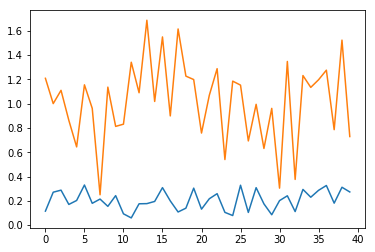

In [21]:
df = pd.read_csv("data/clean_data.csv")
df = df.apply(pd.to_numeric,errors = "coerce")
df = df.drop("date", axis=1)
m_traces = analyze(df, "m", 100, 40)
n_traces = analyze(df, "n", 100, 40)


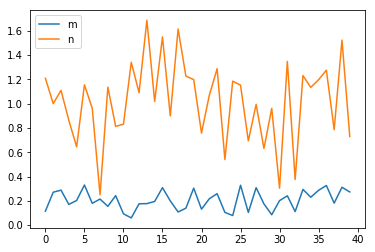

In [26]:
plt.plot(m_traces, label = "m")
plt.plot(n_traces, label = "n")
plt.legend()
plt.show()